<a href="https://colab.research.google.com/github/xiaochengJF/DeepLearning/blob/master/Course_2_Week_3_%E4%BD%9C%E4%B8%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 设置路径

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

In [0]:
cd /content/gdrive/My Drive/DL-GPU/DeepLearning/Course 2 - Week 3/

# 从这里开始

In [0]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
import tf_utils
import time

%matplotlib inline
np.random.seed(1)

In [4]:
y_hat = tf.constant(36, name = "y_hat") #定义固定值
y = tf.constant(39, name = "y")

loss = tf.Variable((y - y_hat) ** 2, name="loss") #为损失函数创建变量

init = tf.global_variables_initializer() # 运行之后的初始化ession.run(init)

with tf.Session() as session: #创建session 并打印
    session.run(init)
    print(session.run(loss))

Instructions for updating:
Colocations handled automatically by placer.
9


In [5]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a,b)

print(c) # 结果Tensor类型变量，没维度，数据类型int32，结构放到了“计算图（computation graph）”

Tensor("Mul:0", shape=(), dtype=int32)


In [6]:
# 建立会话并运行
print(tf.Session().run(c))

20


In [7]:
# 占位符和feed_dict
x = tf.placeholder(tf.int64, name="x") # 占位符是一个对象，它的值只能稍后指定
print(tf.Session().run(2 * x, feed_dict={x:3})) # 用feed字典作为变量传入
tf.Session().close()

6


In [0]:
# 线性函数
def linear_function():
    """
    """
    np.random.seed(1) # 指定随机种子
    
    X = np.random.randn(3, 1)
    W = np.random.randn(4, 3)
    b = np.random.randn(4, 1)
    
    Y = tf.add(tf.matmul(W, X), b) # tf.matmul矩阵乘法
    # Y = tf.matmul(W, X) + b
    
    # 创建会话
    sess = tf.Session()
    result = sess.run(Y)
    
    # 关闭会话
    sess.close()
    
    return result

In [9]:
print("result = " + str(linear_function()))

result = [[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


In [0]:
# 计算sigmoid
def sigmoid(Z):
    """"""
    #创建占位符x，名叫“x”
    x = tf.placeholder(tf.float32, name="x")
    
    #计算sigmoid(Z)
    sigmoid = tf.sigmoid(x)
    
    # 创建会话，有两种方式
    # 方式一
    with tf.Session() as sess:
        result = sess.run(sigmoid, feed_dict= {x : Z})
    #方式二
    #sess = tf.Session()
    #result = sess.run(sigmoid, feed_dict= {x : Z})
    #sess.close() #不同点
    
        
    return result

In [11]:
print("sigmoid = " + str(sigmoid(0)))
print("sigmoid = " + str(sigmoid(12)))

sigmoid = 0.5
sigmoid = 0.9999938


In [0]:
# 使用独热编码（0、1编码）
def one_hot_matrix(lables, C):
    """"""
    # 创建。。，赋值为C
    C = tf.constant(C, name="C")
    
    # 使用one_hot
    one_hot_matrix = tf.one_hot(indices = lables, depth=C, axis=0)
    
    sess = tf.Session()
    one_hot = sess.run(one_hot_matrix)
    sess.close()
    
    return one_hot

In [13]:
lables = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(lables, C=4)
print(str(one_hot))

[[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [0]:
# 初始化为0和1
def ones(shape):
    """"""
    ones = tf.ones(shape)
    sess = tf.Session()
    ones = sess.run(ones)
    sess.close()
    
    return ones

In [15]:
print("ones = " + str(ones(3))) # 参数3加中括号大括号或者不加都一样

ones = [1. 1. 1.]


In [0]:
# 构建神经网络
# 加载数据集
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = tf_utils.load_dataset()

Y = 1


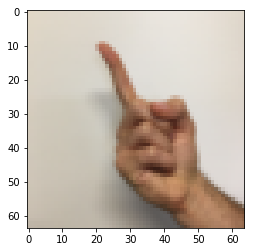

In [17]:
# 看看数据集有什么
index = 11
plt.imshow(X_train_orig[index])
print("Y = " + str(np.squeeze(Y_train_orig[:, index])))

In [18]:
#数据扁平化、除以255归一化，将标签转化为独热向量
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T #每列作为一个样本
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T

# 归一化
X_train = X_train_flatten / 255
X_test = X_test_flatten / 255

# 转化为独热矩阵(示例)
Y_train = tf_utils.convert_to_one_hot(Y_train_orig, 6)
Y_test = tf_utils.convert_to_one_hot(Y_test_orig, 6)

print("训练集样本数 = " + str(X_train.shape[1]))
print("测试集样本数 = " + str(X_test.shape[1]))
print("X_train.shape: " + str(X_train.shape))
print("Y_train.shape: " + str(Y_train.shape))
print("X_test.shape: " + str(X_test.shape))
print("Y_test.shape: " + str(Y_test.shape))

训练集样本数 = 1080
测试集样本数 = 120
X_train.shape: (12288, 1080)
Y_train.shape: (6, 1080)
X_test.shape: (12288, 120)
Y_test.shape: (6, 120)


In [0]:
# 创建placeholders占位符
def create_placeholders(n_x, n_y):
    """
    """
    X = tf.placeholder(tf.float32, [n_x, None], name = "X") #用None，便于灵活处理数据
    Y = tf.placeholder(tf.float32, [n_y, None], name = "Y")
    
    return X,Y

In [20]:
X, Y = create_placeholders(12288, 6)
print("X = " + str(X))
print("Y = " + str(Y))

X = Tensor("X_3:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Y_1:0", shape=(6, ?), dtype=float32)


In [0]:
# 初始化参数 Xavier初始化权重零初始化偏差
def initialize_parameters():
    """
    """
    tf.set_random_seed(1) #指定随机种子，和numpy中的有什么不一样
    
    W1 = tf.get_variable("W1", [25, 12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    # 注意tf.Variable（每次都创建新对象）和tf.get_variable（返回已有对象，没则新建）区别
    b1 = tf.get_variable("b1", [25, 1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12, 25], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b2", [12, 1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [6, 12], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b3 = tf.get_variable("b3", [6, 1], initializer = tf.zeros_initializer())
    
    parameters = {
        "W1" : W1,
        "b1" : b1,
        "W2" : W2,
        "b2" : b2,
        "W3" : W3,
        "b3" : b3
    }
    
    return parameters

In [22]:
tf.reset_default_graph() #用于清除默认图形堆栈并重置全局默认图形

with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))
#参数只有物理空间，还没被赋值，因为没通过session执行


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


In [0]:
# 向前传播
def forward_propagation(X, parameters):
    """"""
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    Z1 = tf.matmul(W1, X) + b1 # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1) #A1 = relu(Z1)
    Z2 = tf.matmul(W2, A1) + b2 # Z1 = np.dot(W2, X) + b2
    A2 = tf.nn.relu(Z2) #A1 = relu(Z1)
    Z3 = tf.matmul(W3, A2) + b3 # Z1 = np.dot(W3, X) + b3
    
    return Z3

In [24]:
tf.reset_default_graph()
with tf.Session() as sess:
    X,Y = create_placeholders(12288,6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X,parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("add_2:0", shape=(6, ?), dtype=float32)


In [0]:
# 计算成本
def compute_cost(Z3, Y):
    """
    """
    logits = tf.transpose(Z3) #转置
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
    return cost

In [26]:
tf.reset_default_graph()

with tf.Session() as sess:
    X,Y = create_placeholders(12288,6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X,parameters)
    cost = compute_cost(Z3,Y)
    print("cost = " + str(cost))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

cost = Tensor("Mean:0", shape=(), dtype=float32)


In [0]:
# 反向传播和更新参数都可以用一句代码解决
# 构建模型
def model(X_train, Y_train, X_test, Y_test,
         learning_rate=0.0001, num_epochs=1500, minibatch_size=32,
         print_cost=True, is_plot=True):
    """
    """
    ops.reset_default_graph() # 能重新运行模型而不覆盖tf变量################################
    tf.set_random_seed(1)
    seed = 3
    (n_x, m) = X_train.shape #获取输入节点数目和样本数
    n_y = Y_train.shape[0] # 获取输出节点数
    costs = [] #成本集
    
    X, Y = create_placeholders(n_x, n_y)
    
    #初始化参数
    parameters = initialize_parameters()
    
    #向前传播
    Z3 = forward_propagation(X, parameters)
    
    # 计算成本
    cost = compute_cost(Z3, Y)
    
    #反向传播，使用Adam优化
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    #初始化所有变量
    init = tf.global_variables_initializer()
    
    # 开始会话并计算
    with tf.Session() as sess:
        #初始化
        sess.run(init)
        
        #正常训练的循环
        for epoch in range(num_epochs):
            epoch_cost = 0 #每代的成本
            num_minibatches = int(m / minibatch_size) # minibatch总数量
            seed = seed + 1
            minibatches = tf_utils.random_mini_batches(X_train, Y_train, minibatch_size, seed)
            
            for minibatch in minibatches:
                #选择一个minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                #数据就绪，开始运行session
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict = {X : minibatch_X, Y:minibatch_Y})
                # _作为一次性变量来储存不需要的值
                
                # 计算这个minibatch在这一代所占的误差
                epoch_cost = epoch_cost + minibatch_cost / num_minibatches
                
            # 记录并打印成本
            if epoch % 5 == 0:
                costs.append(epoch_cost)
                if print_cost and epoch % 100 == 0:
                    print("epoch = " + str(epoch) + " epoch_cost = " + str(epoch_cost))
                    
        # 是否绘制图谱
        if is_plot:
            plt.plot(np.squeeze(costs))
            plt.ylabel('cost')
            plt.xlabel('iterations (per tens)')
            plt.title("Learning rate =" + str(learning_rate))
            plt.show()
            
        # 保存学习参数
        parameters = sess.run(parameters)
        print("参数已保存到session")
        
        # 计算当前预测结果
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))#???????????
        
        # 计算准确率
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        #????????????????????????????????????????????????
        
        print("训练集准确率：", accuracy.eval({X : X_train, Y : Y_train}))
        print("训练集准确率：", accuracy.eval({X : X_test, Y : Y_test}))
        
        return parameters

epoch = 0 epoch_cost = 1.8557019089207505
epoch = 100 epoch_cost = 1.0164577473293652
epoch = 200 epoch_cost = 0.7331024751518711
epoch = 300 epoch_cost = 0.5729151666164399
epoch = 400 epoch_cost = 0.4686893865917668
epoch = 500 epoch_cost = 0.3809471171010624
epoch = 600 epoch_cost = 0.31381642592675757
epoch = 700 epoch_cost = 0.25417795461235626
epoch = 800 epoch_cost = 0.20379619435830548
epoch = 900 epoch_cost = 0.1664852527054874
epoch = 1000 epoch_cost = 0.14096723880731699
epoch = 1100 epoch_cost = 0.10788452783317277
epoch = 1200 epoch_cost = 0.08632906814190473
epoch = 1300 epoch_cost = 0.06095791698405235
epoch = 1400 epoch_cost = 0.05091985388461386


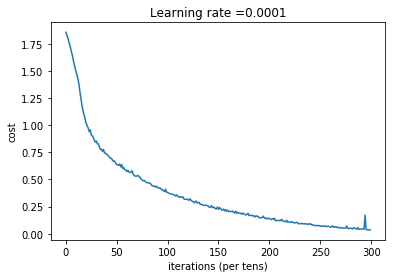

参数已保存到session
训练集准确率： 0.9990741
训练集准确率： 0.725
cpu执行时间 = 311.570644秒


In [29]:
# 开始时间
start_time = time.clock()
# 开始训练
parameters = model(X_train, Y_train, X_test, Y_test)
# 结束时间
end_time = time.clock()
# 计算时差
print("cpu执行时间 = " + str(end_time - start_time) + "秒")

预测结果：y = 5


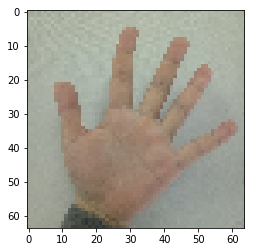

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

my_test = "5.png"
filename = "images/" + my_test
image = mpimg.imread(filename)
plt.imshow(image)
my_test = image.reshape(1,64*64*3).T
my_test_pre = tf_utils.predict(my_test,parameters)
print("预测结果：y = " + str(np.squeeze(my_test_pre)))